In [6]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame for easier inspection
df = pd.DataFrame(X_scaled, columns=iris.feature_names)
df['target'] = y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [8]:
from sklearn.metrics import accuracy_score

k_values = [1, 3, 5, 7, 9]

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    y_pred_k = knn_k.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    print(f"Accuracy for K={k}: {acc:.2f}")


Accuracy for K=1: 0.98
Accuracy for K=3: 1.00
Accuracy for K=5: 1.00
Accuracy for K=7: 1.00
Accuracy for K=9: 1.00


Accuracy (k=5): 1.00


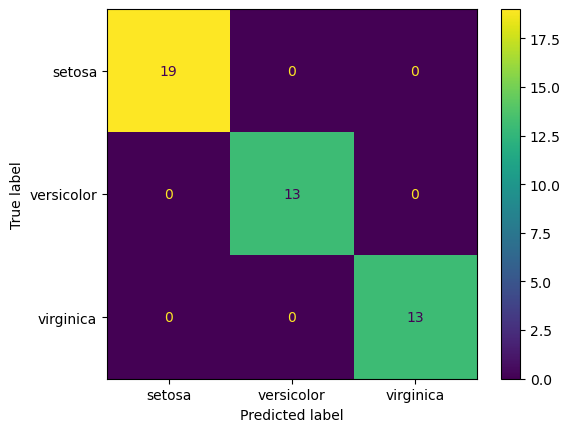

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (k=5): {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()


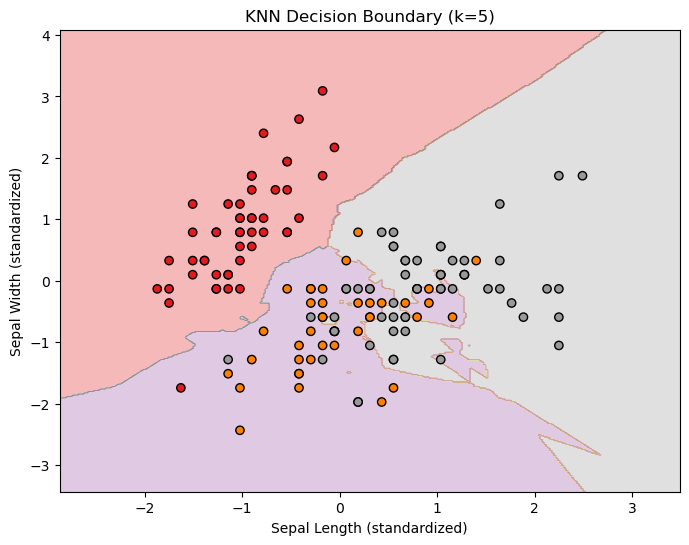

In [10]:
import numpy as np
import matplotlib.pyplot as plt
X_2d = X[:, :2]
X_2d_scaled = scaler.fit_transform(X_2d)
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d_scaled, y, test_size=0.3, random_state=42)
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_2d, y_train_2d)
x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Sepal Width (standardized)")
plt.title("KNN Decision Boundary (k=5)")
plt.show()
